In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
pd.options.mode.chained_assignment = None
plt.rcParams.update({'figure.max_open_warning': 0})

# Editing the dataset

In [2]:
df = pd.read_csv('CONSOLE_DIGITAL_MARKETING_APP_DATE_APPLE.csv', parse_dates=['DATE'], dayfirst=True)
df['C'] = df['C_COMPILER'] + df['C_TUTORIAL']
df['CPLUSPLUS'] = df['CPLUSPLUS_COMPILER'] + df['CPLUSPLUS_TUTORIAL']
df['CSHARP'] = df['CSHARP_COMPILER'] + df['CSHARP_TUTORIAL']
df['DART'] = df['DART_COMPILER'] + df['DART_TUTORIAL']
df['GO'] = df['GO_COMPILER'] + df['GO_TUTORIAL']
df['JAVA'] = df['JAVA_COMPILER'] + df['JAVA_TUTORIAL']
df['JAVASCRIPT'] = df['JAVASCRIPT_COMPILER'] + df['JAVASCRIPT_TUTORIAL']
df['KOTLIN'] = df['KOTLIN_COMPILER'] + df['KOTLIN_TUTORIAL']
df['PHP'] = df['PHP_COMPILER'] + df['PHP_TUTORIAL']
df['PYTHON'] = df['PYTHON_COMPILER'] + df['PYTHON_TUTORIAL']
df['RUBY'] = df['RUBY_COMPILER'] + df['RUBY_TUTORIAL']
df['SWIFT'] = df['SWIFT_COMPILER'] + df['SWIFT_TUTORIAL']
df.drop(labels=['C_COMPILER', 'C_TUTORIAL', 'CPLUSPLUS_COMPILER', 'CPLUSPLUS_TUTORIAL', 'CSHARP_COMPILER', 'CSHARP_TUTORIAL', 'DART_COMPILER','DART_TUTORIAL', 'GO_COMPILER', 'GO_TUTORIAL', 'JAVA_COMPILER', 'JAVA_TUTORIAL', 'JAVASCRIPT_COMPILER', 'JAVASCRIPT_TUTORIAL', 'KOTLIN_COMPILER', 'KOTLIN_TUTORIAL', 'PHP_COMPILER', 'PHP_TUTORIAL', 'PYTHON_COMPILER', 'PYTHON_TUTORIAL', 'RUBY_COMPILER', 'RUBY_TUTORIAL', 'SWIFT_COMPILER', 'SWIFT_TUTORIAL'], axis=1, inplace=True)
df.head()

,DATE,CALCULATORPLUS,CALENDARPLUS,COMPILERPLUS,CSS_TUTORIAL,HTML_TUTORIAL,MOTIVATIONPLUS,NOTESPLUS,SUCCESS_STORIES,TASKSPLUS,...,CSHARP,DART,GO,JAVA,JAVASCRIPT,KOTLIN,PHP,PYTHON,RUBY,SWIFT
0,2021-03-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-03-09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-03-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-03-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-03-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Converting DATE to index and choosing the platform to view data analysis
- If the user want to check the data analysis for a specific platform, then change the "platform" variable to that specific platform. For example, platform = 'CPLUSPLUS'

In [3]:
#for platform in df.columns[1:]:
#    print(platform)
platfrom = 'C'
data=pd.DataFrame({'DATE': df['DATE'], '{}'.format(platfrom): df['{}'.format(platfrom)]})
data.set_index("DATE",inplace=True)
data.head()

,C
DATE,
2021-03-08,0
2021-03-09,0
2021-03-10,0
2021-03-11,0
2021-03-13,0


## Plotting the daily View Count for the app 

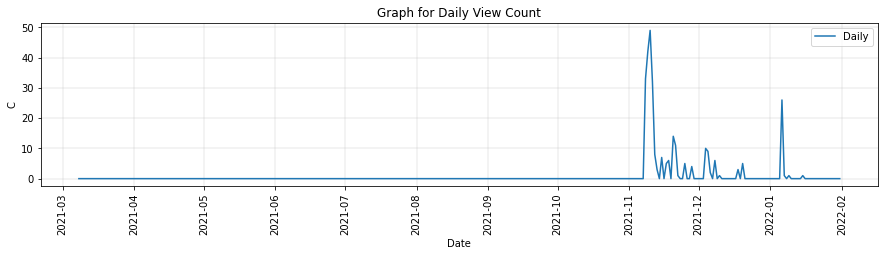

In [4]:
plt.rcParams.update({'figure.figsize': (15, 3)})
fig, ax = plt.subplots()
sns.lineplot(data=data, x='DATE', y=data.columns[0], label ='Daily')
plt.xlabel('Date')
plt.ylabel(data.columns[0])
plt.title('Graph for Daily View Count')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

## Converting daily View Count to weekly View Count and changing the DATE into ordinal format

In [5]:
import datetime as dt
data = data.resample('w').mean()
data['DATE'] = data.index
data['DATE'] = data['DATE'].map(dt.datetime.toordinal)
data.head()

,C,DATE
DATE,,
2021-03-14,0.0,737863
2021-03-21,0.0,737870
2021-03-28,0.0,737877
2021-04-04,0.0,737884
2021-04-11,0.0,737891


## Plotting the weekly View Count for the app 

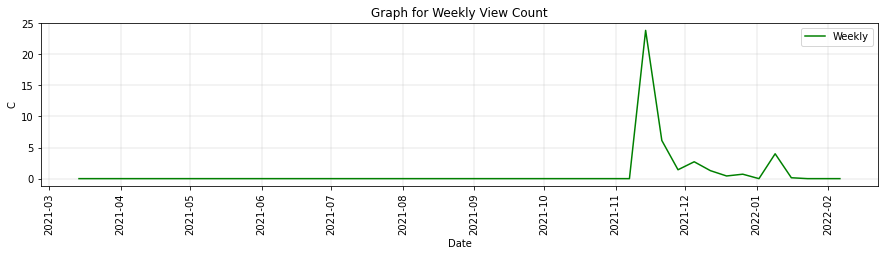

In [6]:
plt.rcParams.update({'figure.figsize': (15, 3)})
fig, ax = plt.subplots()
sns.lineplot(data=data, x=data.index, y=data.columns[0], label ='Weekly', color='Green')
plt.xlabel('Date')
plt.ylabel(data.columns[0])
plt.title('Graph for Weekly View Count')
plt.grid(linestyle='-', linewidth=0.3)
ax.tick_params(axis='x', rotation=90)

### Splitting data into train and test

In [7]:
test = data.tail(12)
train = data
X_train, y_train = train['DATE'], train[data.columns[0]]
X_test, y_test = test['DATE'], test[data.columns[0]]

### Using xgboost model for Time Series Forecasting

In [8]:
reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
reg.fit(X_train, 
        y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='mae',
        verbose=0)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### Validating Data

In [9]:
validations = reg.predict(X_test)
test['validations'] = validations

### Plotting the original data against the validated data

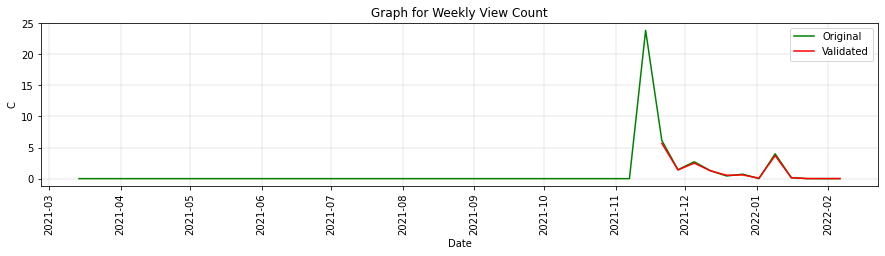

In [10]:
plt.rcParams.update({'figure.figsize': (15, 3)})
fig, ax = plt.subplots()
sns.lineplot(data=train, x=train.index, y=data.columns[0], label ='Original', color='Green')
sns.lineplot(data=test, x=test.index, y='validations', label ='Validated', color='Red')
plt.grid(linestyle='-', linewidth=0.3)
plt.xlabel('Date')
plt.ylabel(data.columns[0])
plt.title('Graph for Weekly View Count')
plt.legend()
ax.tick_params(axis='x', rotation=90)

# Graphs for all the platforms

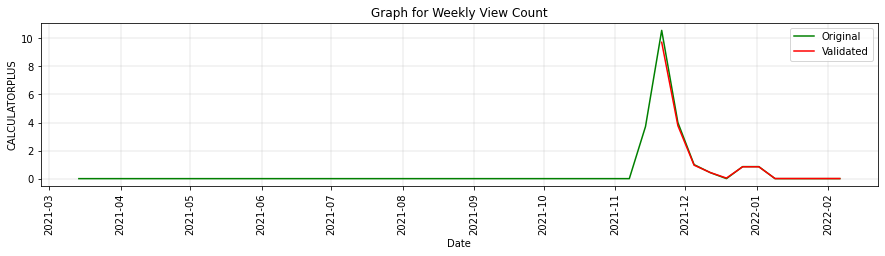

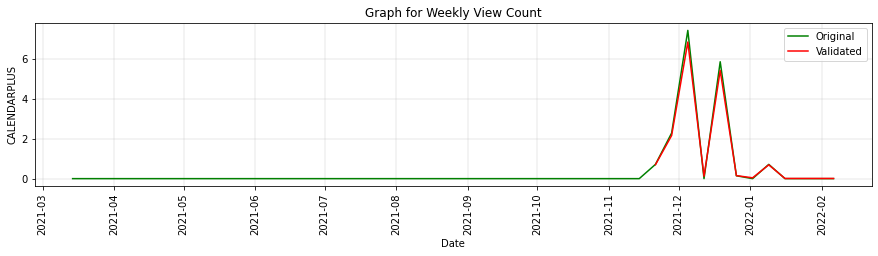

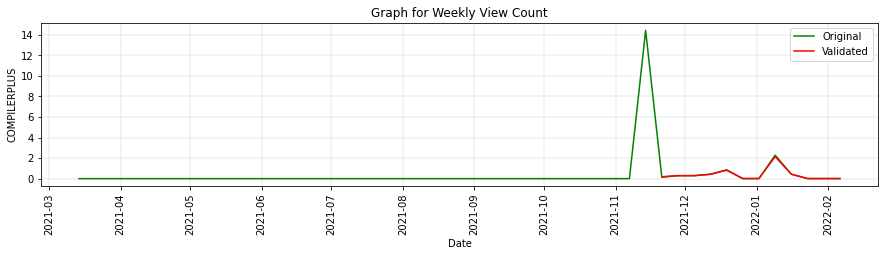

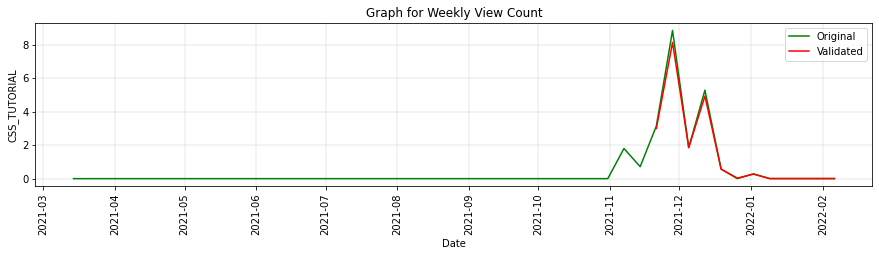

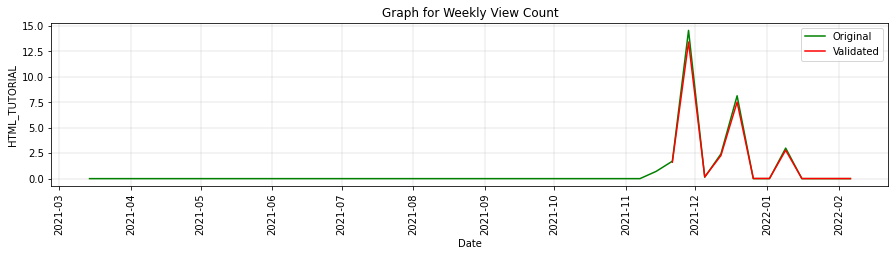

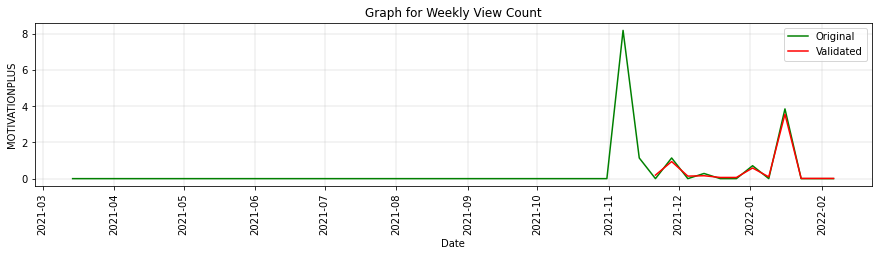

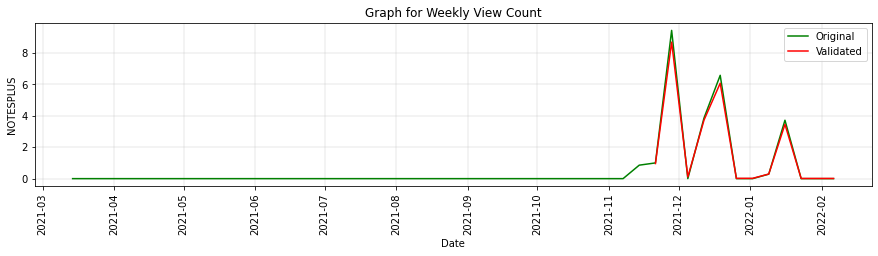

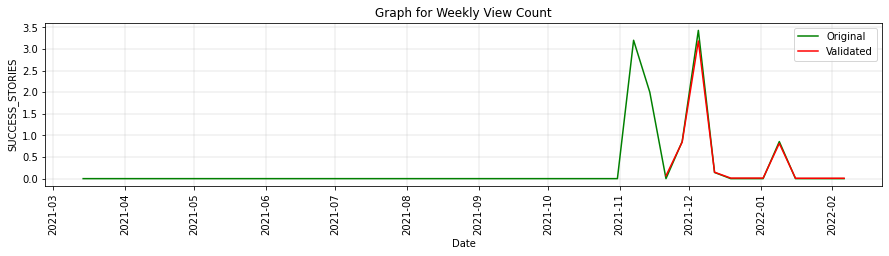

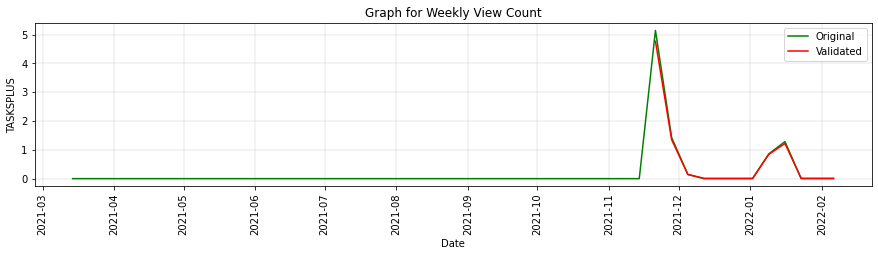

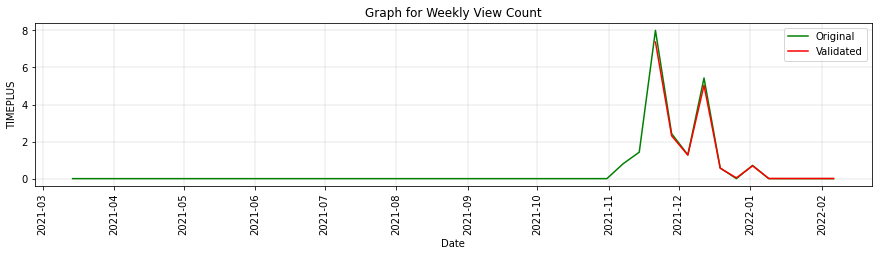

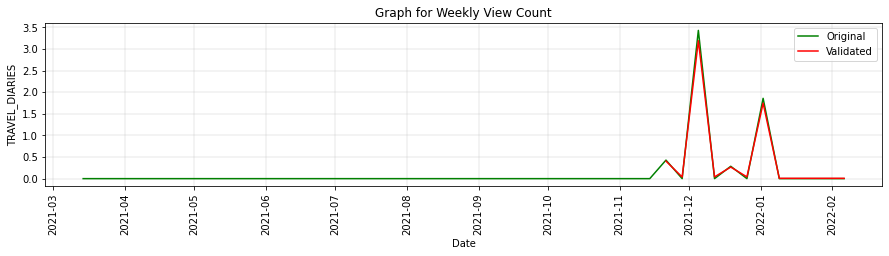

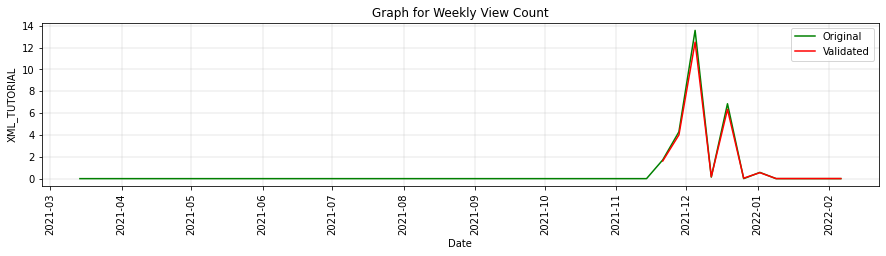

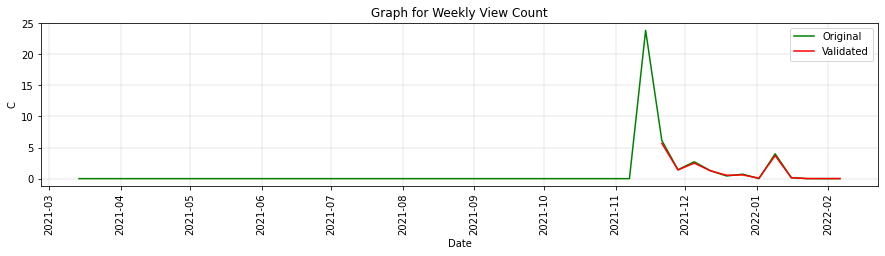

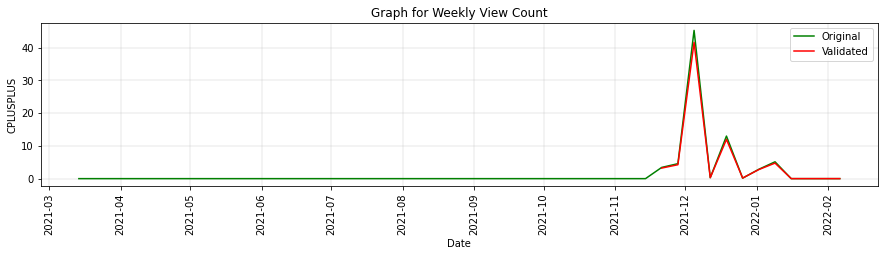

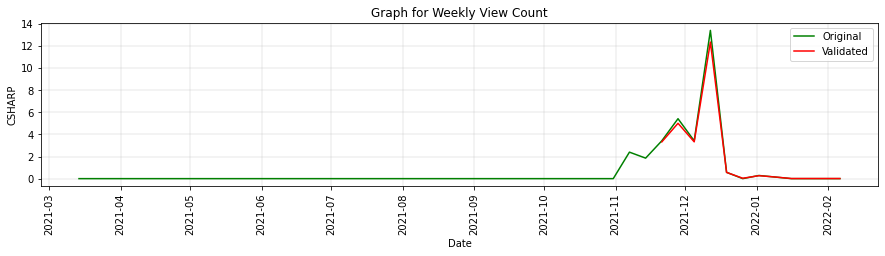

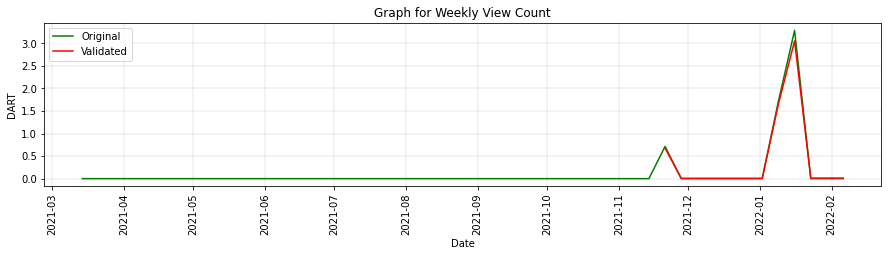

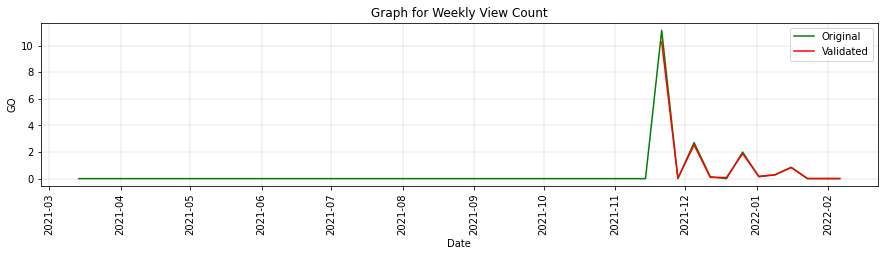

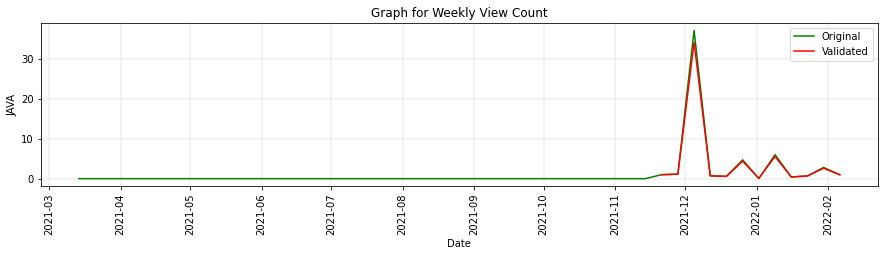

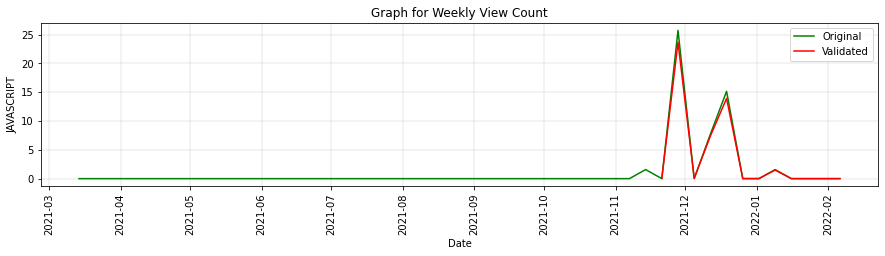

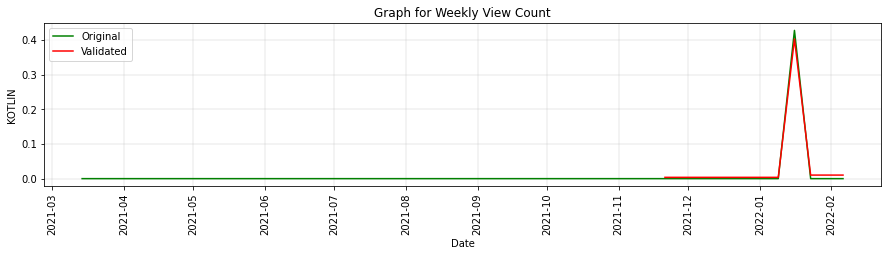

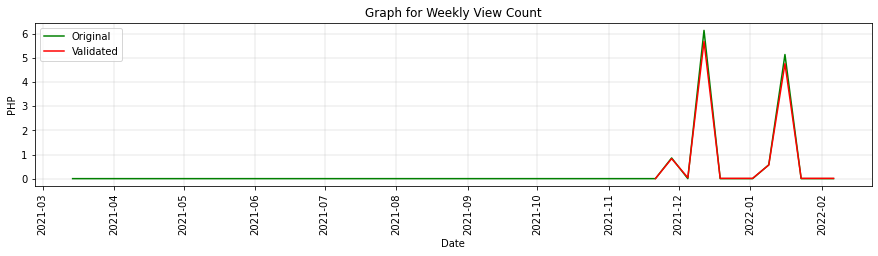

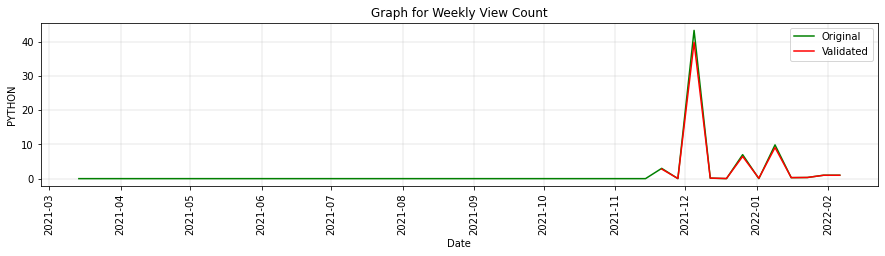

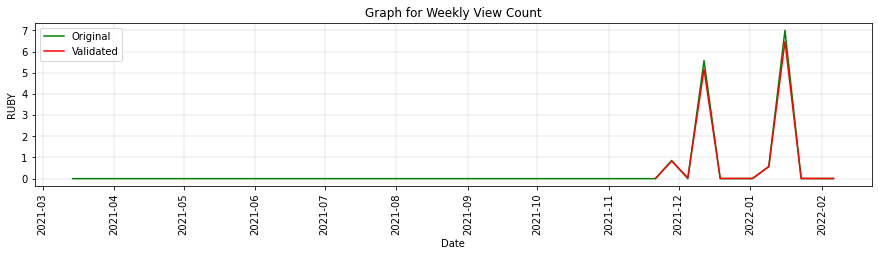

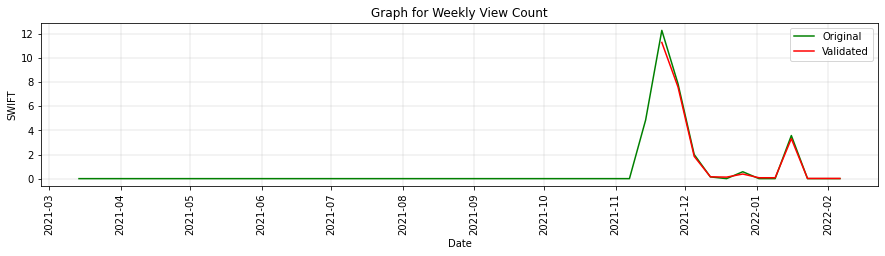

In [11]:
for platform in df.columns[1:]:
    data=pd.DataFrame({'DATE': df['DATE'], '{}'.format(platform): df['{}'.format(platform)]})
    data.set_index("DATE",inplace=True)
    
    import datetime as dt
    data = data.resample('w').mean()
    data['DATE'] = data.index
    data['DATE'] = data['DATE'].map(dt.datetime.toordinal)
    
    test = data.tail(12)
    train = data
    X_train, y_train = train['DATE'], train[data.columns[0]]
    X_test, y_test = test['DATE'], test[data.columns[0]]
    
    reg = XGBRegressor(n_estimators=500, learning_rate=0.01)
    reg.fit(X_train, 
            y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            eval_metric='mae',
            verbose=0)
    
    validations = reg.predict(X_test)
    test['validations'] = validations
    
    plt.rcParams.update({'figure.figsize': (15, 3)})
    fig, ax = plt.subplots()
    sns.lineplot(data=train, x=train.index, y=data.columns[0], label ='Original', color='Green')
    sns.lineplot(data=test, x=test.index, y='validations', label ='Validated', color='Red')
    plt.grid(linestyle='-', linewidth=0.3)
    plt.xlabel('Date')
    plt.ylabel(data.columns[0])
    plt.title('Graph for Weekly View Count')
    plt.legend()
    ax.tick_params(axis='x', rotation=90)